# "Fun with Loot Boxes" Lab

> Author: Caroline Schmitt, Matt Brems

### Scenario:

You're an analyst for [Zynga](https://en.wikipedia.org/wiki/Zynga), a gaming studio working on an event for an MMO (massively multiplayer online) game. This event is going to include **loot boxes**.

<img src="https://vignette.wikia.nocookie.net/2007scape/images/0/06/Culinaromancer%27s_chest.png/revision/latest?cb=20180403231423" alt="drawing" width="150"/> 

A loot box is basically a treasure chest in a game. This loot box can be opened to reveal a variety of items: some items are very rare and valuable, other items are common and less valuable. (You may consult [the esteemed Wikipedia](https://en.wikipedia.org/wiki/Loot_box) for a more extensive definition.)

In our specific game, suppose that loot boxes can be obtained in one of two ways: 
- After every three hours of playing the game, a user will earn one loot box.
- If the user wishes to purchase a loot box, they may pay $1 (in real money!) for a loot box.

These loot boxes are very good for our business!
- If a player earns a loot box, it means they are spending lots of time on the game. This often leads to advertisement revenue, they may tell their friends to join the game, etc.
- If the player purchases a loot box, it means we've earned $1 from our customer.

Suppose each loot box is opened to reveal either:
- magical elixir (super rare, very valuable), or
- nothing.

Whether each loot box contains the elixir or nothing is **random**. Our boss wants some guidance on what sort of randomness to use on these loot boxes! 
- If the magical elixir is too rare, then users may not be motivated to try to get them, because they believe they'll never find the magical elixir.
- If the magical elixir is too common, then users may not be motivated to try to get them, because the game has so much of the magical elixir that it isn't worthwhile to try to get it.

However, our boss isn't a math-y type person! When explaining things to our boss, we need to explain the impact of our choices on the game as concretely as possible.

### Version 1
In our first version of the game, we'll say that loot boxes contain magical elixir 15% of the time and nothing 85% of the time.

#### 1. Our boss asks, "If a user buys 100 loot boxes, how many elixirs will they get?" How would you respond?

Ans: They will get 15 elixirs. Since 15% of the time a magical elixir appears, 15% of 100 is 15.

#### 2. Our boss asks, "How many loot boxes does someone have to purchase in order to definitely get elixir?" How would you respond?

Ans: 0.15 times 6 is 0.9. 0.15 times 7 is 1.05. Therefore, purchasing 7 loot boxes might get you an elixir. However, this might not be accurate because all 7 boxes might be empty.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


#### 3. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" This is a bit more complicated, so let's break it down before answering.

#### 3a. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. Why is $X$ a discrete random variable?

Ans: $X$ is a discrete random variable because the number of elixirs is countable.

#### 3b. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $X$ counts up how many elixirs I observe out of my 100 loot boxes. What distribution is best suited for $X$? Why?
- Hint: It may help to consider getting the magical elixir a "success" and getting nothing a "failure." 

Ans: Binomial Distribution is best suited for $X$. We want to find the sum of "successes", which is equivalent to counting how many elixirs.

#### 3c. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the probability mass function to answer the boss' question.

0.06631976581888133
The probability that a user gets more than 20 elixirs is 6.632%.


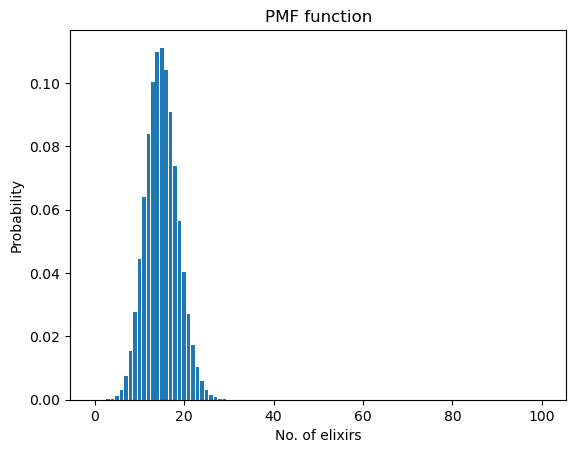

In [3]:
p_elixir = .15
n_loots = 100
# expected value is 0.15*100 = 15
# 15 is where the highest probability occurs

loot_distn = stats.binom(n_loots, p_elixir)

possible_elixir = list(range(0, 101))

plt.bar(possible_elixir,
        loot_distn.pmf(possible_elixir))
plt.xlabel('No. of elixirs')
plt.ylabel('Probability')
plt.title('PMF function')

print(loot_distn.pmf(possible_elixir)[21:].sum()) 
# calculating sum of probabilities in PMF function from index 21 to 100
print(f"The probability that a user gets more than 20 elixirs is 6.632%.")

#### 3d. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Use the cumulative distribution function to answer the boss' question.

0.06631976581888177
The probability that a user gets more than 20 elixirs is 6.632%.


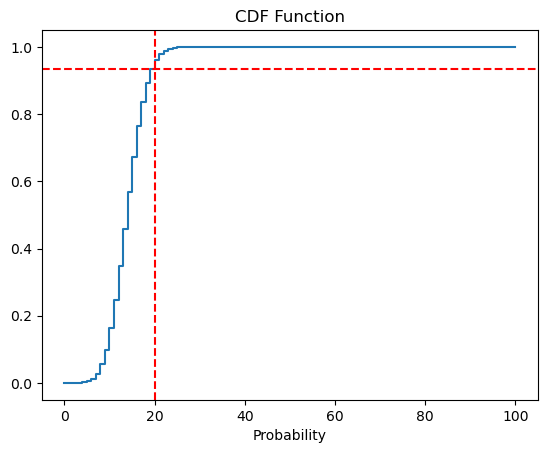

In [4]:
plt.step(possible_elixir, loot_distn.cdf(possible_elixir))
plt.xlabel('No. of elixirs')
plt.xlabel('Probability')
plt.title('CDF Function')
plt.axvline(x=20, color='red', linestyle='--')
plt.axhline(y=loot_distn.cdf(20), color='red', linestyle='--')

print(1 - loot_distn.cdf(possible_elixir)[20]) # take 1 minus the probability in index 20 of the CDF function
print(f"The probability that a user gets more than 20 elixirs is 6.632%.")

#### 3e. Our boss asks, "If a user earns 100 loot boxes, what is the chance that a user gets more than 20 elixirs?" Answer your boss' question. *Remember that your boss is not a math-y person!*

In [5]:
print(f"The chance that a user gets more than 20 elixirs is 6.632%.")

The chance that a user gets more than 20 elixirs is 6.632%.


#### 4. Your boss wants to know how many people purchased how many loot boxes last month. 
> For example, last month, 70% of users did not purchase any loot boxes. 10% of people purchased one loot box. 5% of people purchased two loot boxes... and so on.

#### 4a. Recall our discrete distributions: discrete uniform, Bernoulli, binomial, Poisson. Let's suppose my random variable $Y$ counts up how many loot boxes each person purchased through the game last month. What distribution is best suited for $Y$? Why?

Ans: Poisson Distribution is best suited for $Y$. There is a timeframe (one month).

#### 4b. Suppose that, on average, your customers purchased 2.7 loot boxes last month. In order for your revenue to be at least $500,000, at least how many users would you need on your platform? (Round your answer up to the nearest thousand.) 

In [6]:
print(500000/2.7)
print(f"We would need at least 186thousand users on our platform.")

185185.18518518517
We would need at least 186thousand users on our platform.


#### 4c. Assume that your platform has the number of users you mentioned in your last answer. Suppose that your platform calls anyone who purchases 5 or more loot boxes in a month a "high value user." How much money do you expect to have earned from "high value users?" How about "low value users?"

In [7]:
n_lootboxes = 2.7 # average number of loot boxes per player
loot_distn = stats.poisson(n_lootboxes)
# find probability of low value users and high value users separately
prob_low_user = loot_distn.cdf(4)
prob_high_user = 1 - loot_distn.cdf(4)
print(f"{prob_high_user*100:.2f}% of users are 'high value users'.")
print(f"{prob_low_user*100:.2f}% of users are 'low value users'.")
# calculate amount of money from high value & low value users
print(f"The amount of money earned from 'high value users' is ${500000*prob_high_user:.2f}.")
print(f"The amount of money earned from 'low value users' is ${500000*prob_low_user:.2f}.")

13.71% of users are 'high value users'.
86.29% of users are 'low value users'.
The amount of money earned from 'high value users' is $68546.07.
The amount of money earned from 'low value users' is $431453.93.


#### 4d. Suppose that you want to summarize how many people purchased how many loot boxes last month for your boss. Since your boss isn't math-y, what are 2-4 summary numbers you might use to summarize this for your boss? (Your answers will vary here - use your judgment!)

In [8]:
no_of_high = prob_high_user*186000
no_of_low = prob_low_user*186000
no_of_loots_high = prob_high_user*500000
no_of_loots_low = prob_low_user*500000
print(no_of_high, no_of_loots_high)
print(no_of_low, no_of_loots_low)

25499.137541042575 68546.0686587166
160500.86245895742 431453.93134128343


Ans: Assuming our revenue last month is at least $500,000 and 1 loot box costs $1,
1) There are 25,499 high value users.
2) These high value users purchased 68,546 loot boxes.
3) There are 160,501 low value users.
4) These low value users purchased 431,454 loot boxes.

#### 5. Your boss asks "How many loot boxes does it take before someone gets their first elixir?" Using `np.random.choice`, simulate how many loot boxes it takes somone to get their first elixir. 
- Start an empty list.
- Use control flow to have someone open loot boxes repeatedly.
- Once they open a loot box containing an elixir, record the number of loot boxes it took in the empty list.
- Repeat this process 100,000 times. 

This simulates how long it takes for someone to open a loot box containing elixir. Share the 5th, 25th, 50th, 75th, and 95th percentiles.

> You may find [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html)  and [this documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html) helpful.

In [9]:
my_list = []
count = 0

while len(my_list) != 100000:
    rand_choice = np.random.choice(['elixir','nope'], p=[0.15,0.85])
    # random choice with prob 0.15 of getting elixir
    if rand_choice == 'nope': # fail to get elixir
        count +=1
    elif rand_choice == 'elixir': # succeed in getting elixir
        count+=1
        my_list.append(count)
        count=0

In [10]:
print(len(my_list))
print(f"The 5th percentile is {np.percentile(my_list, 5):.0f}.")
print(f"The 25th percentile is {np.percentile(my_list, 25):.0f}.")
print(f"The 50th percentile is {np.percentile(my_list, 50):.0f}.")
print(f"The 75th percentile is {np.percentile(my_list, 75):.0f}.")
print(f"The 95th percentile is {np.percentile(my_list, 95):.0f}.")

100000
The 5th percentile is 1.
The 25th percentile is 2.
The 50th percentile is 5.
The 75th percentile is 9.
The 95th percentile is 19.


### Version 2

After a substantial update to the game, suppose every loot box can be opened to reveal *one of four different* items:
- magical elixir (occurs 1% of the time, most valuable)
- golden pendant (occurs 9% of the time, valuable)
- steel armor (occurs 30% of the time, semi-valuable)
- bronze coin (occurs 60% of the time, least valuable)

#### 6. Suppose you want repeat problem 5 above, but do that for the version 2 loot boxes so you can track how many loot boxes are needed to get each item? (e.g. You'd like to be able to say that on average it takes 10 trials to get a golden pendant, 3 trials to get steel armor, and so on.) What Python datatype is the best way to store this data? Why?

Ans: A dictionary with items as keys and lists as values. We can append the number of loot boxes needed into the lists.

Example: \
{'magical elixir': [99, 131, 90], 'golden pendant': [10, 15, 12], 'steel armor': [3, 4, 5], 'bronze coin': [1, 2, 1]}

#### 7. Suppose you and your boss want to measure whether "Version 2" is better than "Version 1." What metrics do you think are important to measure? (Your answers will vary here - use your judgment!)

Ans: We can compare the revenue earned for each version. We can also compare the number of players in each version. With these metrics, we can determine which version is better.